### 🧹 Clear Previous Training and Detection Outputs

In [5]:
import shutil, os

# Clear previous training results
train_output = "yolov5/runs/train/crop_weed_detector"
if os.path.exists(train_output):
    shutil.rmtree(train_output)
    print("🧼 Cleared previous training output.")
else:
    print("✅ No previous training output found.")

🧼 Cleared previous training output.


In [3]:
# Clear previous detection results
detect_output = "yolov5/runs/detect/exp"
if os.path.exists(detect_output):
    shutil.rmtree(detect_output)
    print("🧼 Cleared previous detection output.")
else:
    print("✅ No previous detection output found.")

✅ No previous detection output found.


## 🔍 Crop/Weed Detection with YOLOv5
Train and test a custom YOLOv5 model using your dataset.

In [2]:
# ✅ Setup
import os
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from IPython.display import display

print('⚙️ Environment ready. YOLOv5 training begins below.')


⚙️ Environment ready. YOLOv5 training begins below.


In [1]:
import torch
print("CUDA Available:", torch.cuda.is_available())
print("Device:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No CUDA device")


CUDA Available: True
Device: NVIDIA GeForce RTX 2050


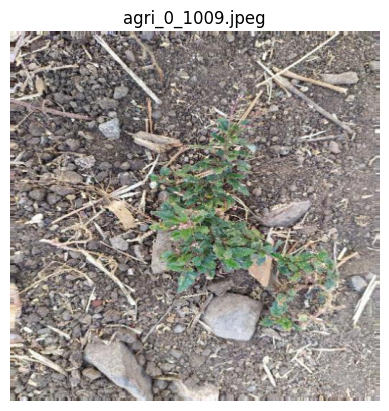

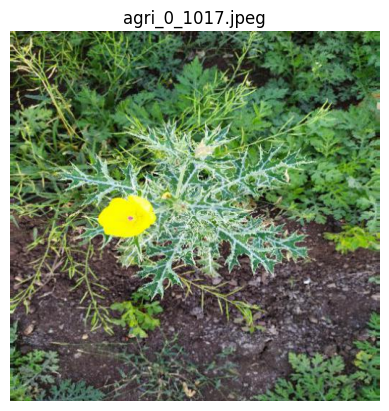

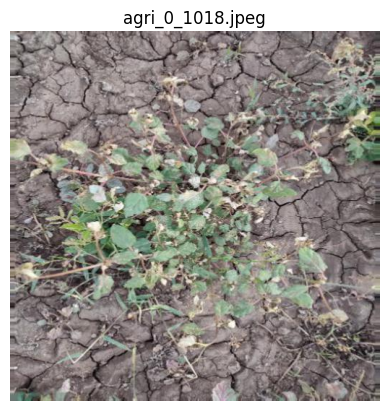

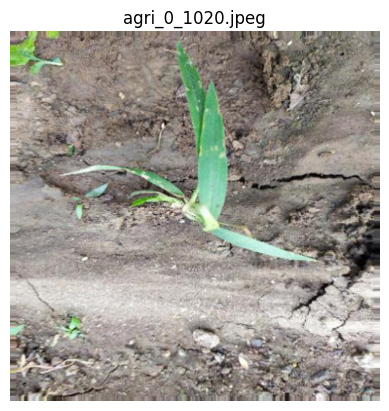

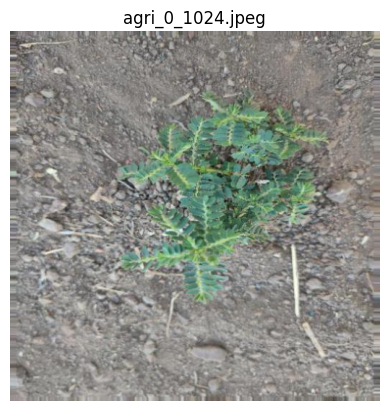

In [2]:
# ✅ Dataset inspection: show sample images
image_dir = Path("data/agri_data/data")
sample_images = list(image_dir.glob("*.jpeg"))[:5]

for img_path in sample_images:
    img = cv2.imread(str(img_path))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(img_path.name)
    plt.axis("off")
    plt.show()


In [3]:
# ✅ Check a label file (YOLO format)
label_file = image_dir / sample_images[0].with_suffix(".txt").name
with open(label_file, "r") as f:
    print(f"Labels for {sample_images[0].name}:")
    print(f.read())


Labels for agri_0_1009.jpeg:
1 0.608398 0.498047 0.541016 0.531250



In [ ]:
!python yolov5/train.py \
  --img 640 \
  --batch 16 \
  --epochs 50 \
  --data yolov5/data/crop_weed.yaml \
  --cfg yolov5/models/yolov5s.yaml \
  --weights yolov5s.pt \
  --name crop_weed_detector \
  --device 0 \
  --workers 0 \
  --project yolov5/runs/train \
  --exist-ok


train: weights=yolov5s.pt, cfg=yolov5/models/yolov5s.yaml, data=yolov5/data/crop_weed.yaml, hyp=yolov5\data\hyps\hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=yolov5\data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=0, project=yolov5/runs/train, name=crop_weed_detector, exist_ok=True, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-416-gfe1d4d99 Python-3.12.7 torch-2.7.0+cu118 CUDA:0 (NVIDIA GeForce RTX 2050, 4096MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_

In [4]:
# ✅ Run detection on test images using trained model
!python yolov5/detect.py \
  --weights yolov5/runs/train/crop_weed_detector/weights/best.pt \
  --img 640 \
  --conf 0.25 \
  --source test/ \
  --device 0 \
  --name crop_weed_test \
  --exist-ok



detect: weights=['yolov5/runs/train/crop_weed_detector/weights/best.pt'], source=test/, data=yolov5\data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5\runs\detect, name=crop_weed_test, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-416-gfe1d4d99 Python-3.12.7 torch-2.7.0+cu118 CUDA:0 (NVIDIA GeForce RTX 2050, 4096MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/10 C:\Users\kbeni\crop_weed_detector\test\crop_1.jpeg: 640x640 2 crops, 21.4ms
image 2/10 C:\Users\kbeni\crop_weed_detector\test\crop_2.jpeg: 640x640 1 crop, 46.5ms
image 3/10 C:\Users\kbeni\crop_weed_detector\test\crop_3.jpeg: 640x640 1 crop, 34.5ms
image 4/

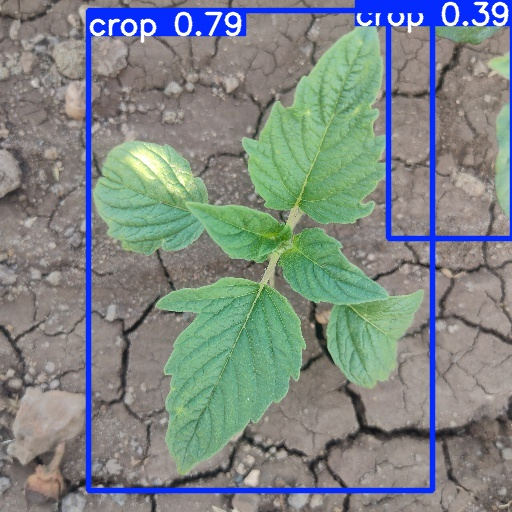

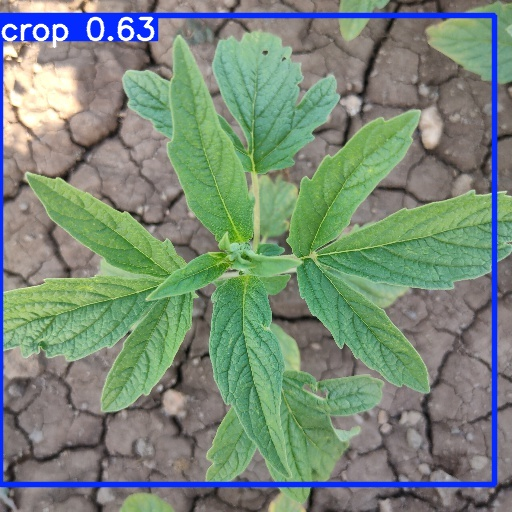

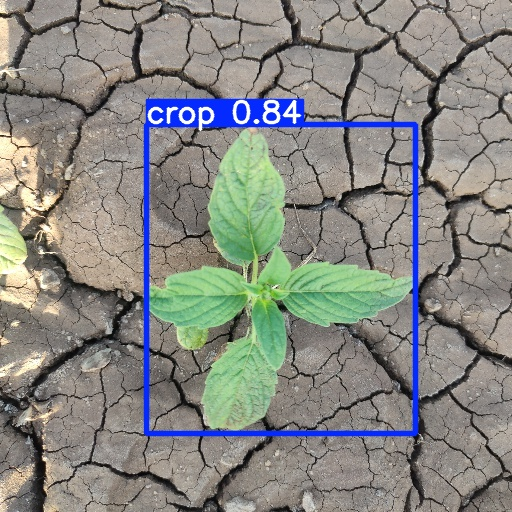

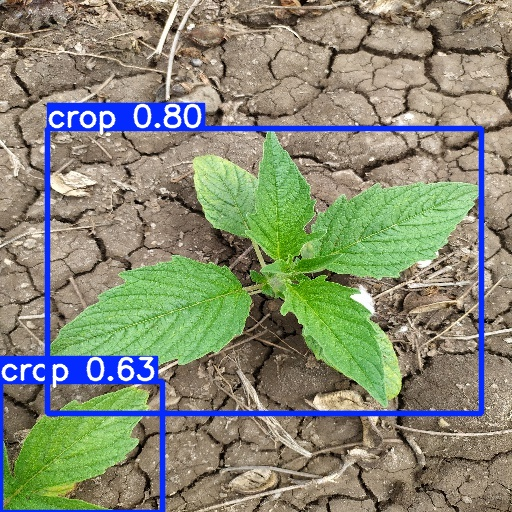

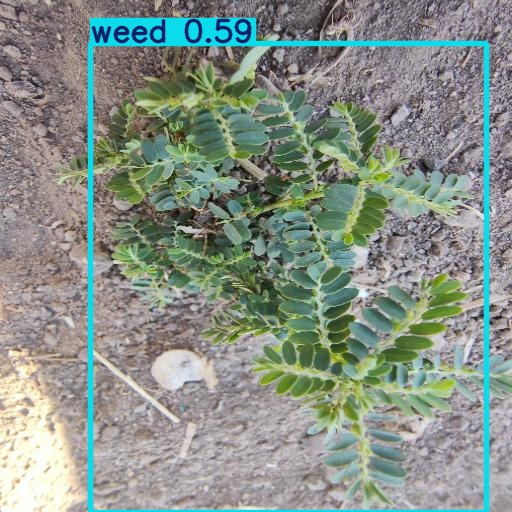

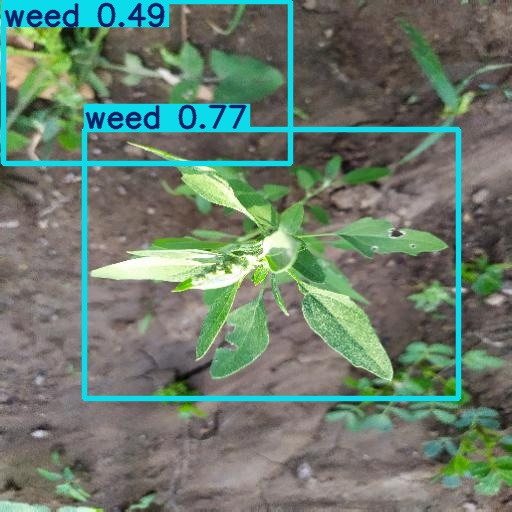

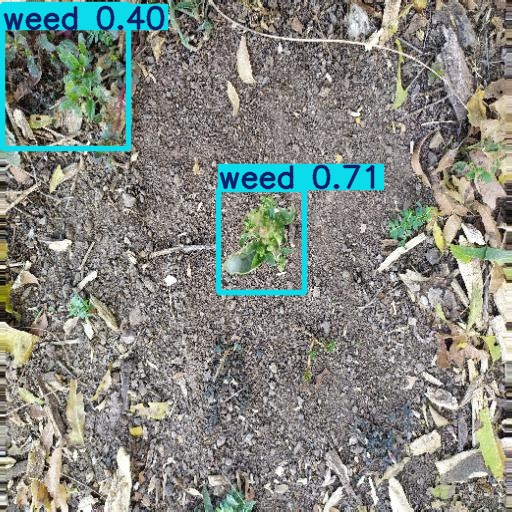

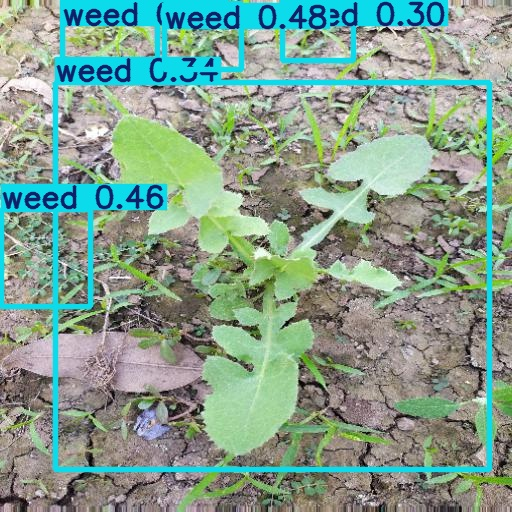

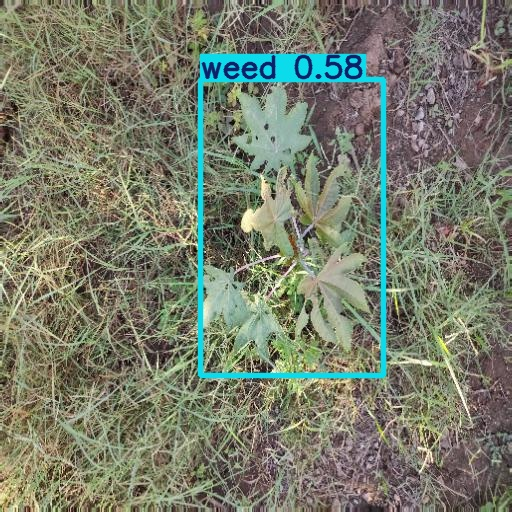

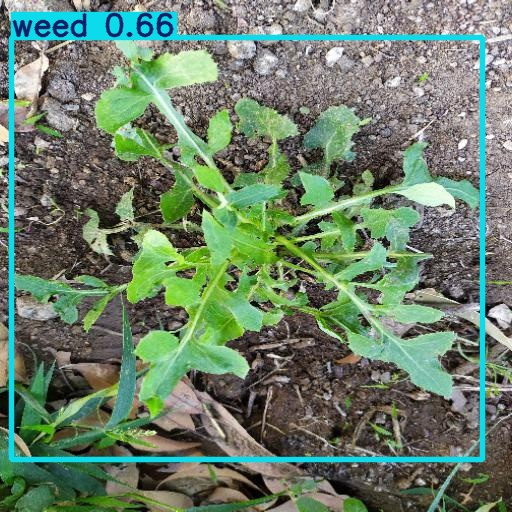

In [5]:
from IPython.display import Image, display
import os

result_dir = "yolov5/runs/detect/crop_weed_test"
for img_file in os.listdir(result_dir):
    if img_file.lower().endswith((".jpg", ".jpeg", ".png")):
        display(Image(filename=os.path.join(result_dir, img_file)))


In [1]:
import zipfile
import os

# Define ZIP path and extraction destination
zip_path = "data/crop-and-weed-detection-data-with-bounding-boxes.zip"
extract_to = "data/agri_data/data"

# Make sure the destination exists
os.makedirs(extract_to, exist_ok=True)

# Extract the dataset
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("✅ Dataset extracted to", extract_to)


✅ Dataset extracted to data/agri_data/data


In [2]:
import os

# Directory containing your training images
image_dir = os.path.join("data", "agri_data", "data")
output_file = "train.txt"

# Make sure directory exists
if not os.path.exists(image_dir):
    raise FileNotFoundError(f"Image directory not found: {image_dir}")

# Collect all JPEG files
image_files = [
    os.path.join(image_dir, f).replace("\\", "/")
    for f in os.listdir(image_dir)
    if f.lower().endswith(".jpeg")
]

# Write to train.txt
with open(output_file, "w") as f:
    for image in image_files:
        f.write(image + "\n")

print(f"✅ Generated {output_file} with {len(image_files)} image paths.")


✅ Generated train.txt with 1310 image paths.


In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import ipywidgets as widgets
import os


In [8]:
# Widget for image upload
upload = widgets.FileUpload(accept='image/*', multiple=False)

def on_upload_change(change):
    if upload.value:
        uploaded_file = next(iter(upload.value.values()))
        content = uploaded_file['content']
        with open("input.jpg", "wb") as f:
            f.write(content)
        detect_image("input.jpg")

upload.observe(on_upload_change, names='value')
display(upload)


FileUpload(value=(), accept='image/*', description='Upload')